## Gradient Descent

In [27]:
import matplotlib.pyplot as plt
from functools import partial
import math
import random

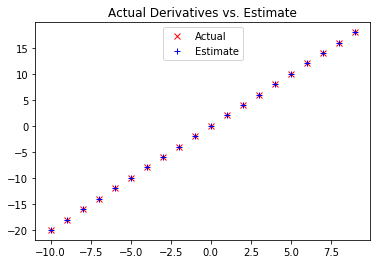

In [28]:
def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)


def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

def square(x):
    return x * x

def derivative(x):
    return 2 * x

def partial_difference_quotient(f, v, i, h):
    """compute the ith partial difference quotient of f at v"""
    w = [v_j + (h if j == i else 0)
         for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h



if __name__ == "__main__":
    
    derivate_estimate = partial(difference_quotient, square, h=0.00001)
    x = range(-10, 10)
    plt.title("Actual Derivatives vs. Estimate")
    plt.plot(x, list(map(derivative, x)), 'rx', label='Actual')            # red
    plt.plot(x, list(map(derivate_estimate, x)), 'b+', label='Estimate')     # blue
    plt.legend(loc=9)
    plt.show()
    
    #pick a random starting point
    v = [random.randint(-10,10) for i in range(3)]
    
    tolerance = 0.0000001
    
    while True:
        gradient = sum_of_squares_gradient(v)
        next_v = step(v, gradient, -0.01)
        if distance_v1(next_v, v) < tolerance:
            break
        v = next_v
        

### Gradient

In [29]:
def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]

def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i 
            for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

def vector_subtract(v, w):
    '''subtracts corresponding elements'''
    result = [v_i - w_i for v_i, w_i in zip(v, w)]    # [1, 2] and [2, 1] results [1-2, 2-1]
    return result

def dot(v, w):
    '''v_1 * w_1 + ... + v_n * w_n'''
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def square_distance(v, w):
    '''(v_1 - w1)^2 + ... + (v_n - w_n)^2'''
    return sum_of_squares(vector_subtract(v, w))

def distance_v1(v, w):
    return math.sqrt(square_distance(v, w))

def safe(f):
    """return a new function that's the same as f,
    except that it outputs inifinity whenever f produces an error"""
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f

def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    '''use gradient descent to find theta that minimize target function'''
    
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    
    theta = theta_0
    target_fn = safe(target_fn)
    value = target_fn(theta)
    
    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                       for step_size in step_size]
        
        # choose the one that minimizes the error function
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)
        
        # stop if we're "converging"
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value
            
def negate(f):
    "return a function that for any input x return -f(x)"
    return lambda *args, **kwargs: -f(*args, **kwargs)

def negate_all(f):
    """the same when f returns a list of numbers"""
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn),
                          negate_all(gradient_fn),
                          theta_0,
                          tolerance)

def in_random_order(data):
    """generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)]
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]
        
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    
    data = zip(x, y)
    theta = theta_0
    alpha = alpha_0
    min_theta, min_value = None, float('inf')
    iterations_with_no_improvement = 0
    
    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum(target_fn(x_i, y_i, theta) for x_i, y_i in data)
        
        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement = 1
            alpha *= 0.9
            
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))
    
    return min_theta
            
def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    return minimize_stochastic(negate(target_fn),
                               negate_all(gradient_fn),
                               x, y, theta_0, alpha_0)
            


if __name__ == "__main__":    
    
    #pick a random starting point
    v = [random.randint(-10,10) for i in range(3)]
    
    tolerance = 0.0000001
    
    while True:
        gradient = sum_of_squares_gradient(v)
        next_v = step(v, gradient, -0.01)
        if distance_v1(next_v, v) < tolerance:
            break
        v = next_v
        
    step_size = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    
